<a href="https://colab.research.google.com/github/Park-New-project/2022_AI_Study_Course/blob/main/%5BAI%5D_221020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로그 함수
- 지수 함수, 로그 함수 관계
- y = loga(x)
- y = -loga(x)
- 두 그래프는 반전

# 로그 함수
- y = -loga(-x)
- y = -loga(1-x)


# 오차 그래프
- 2진 분류 시 오차를 평가하는 그래프

# y = -loga(x) 오차 그래프
- 실제값 1 - 예측 1 : 오차 0
- 실제값 1 - 예측 0 : 오차 무한대

# y = -loga(1-x) 오차 그래프
- 실제 값 0 - 예측 0 : 오차 0
- 실제 값 0 - 예측 1 : 오차 무한대

# 오차 함수
- 2진 분류에서 model 하나 뽑아서 예측 값을 평가하는 함수

- 독립변수 x, 종속변수 y

# 선형회귀
- 단순선형회귀
- 다중선형회귀

# 가장 훌륭한 예측선
- 최소한의 오차를 포함하는 예측선


# 최소 제곱법
- 기울기 a = (x-x평균)(y-y평균)의 합 / (x-x평균)^2 의 합
- y절편 b = Y평균 - x평균 *a 

In [ ]:
# X,Y를 이용하여 최소 제곱법으로 기울기 a 구하기

import numpy as np

X = np.array([2,4,6,8])
Y = np.array([81,93,91,97])

X_mean = X.mean()
print("X_mean", X_mean)
Y_mean = Y.mean()
print("Y_mean", Y_mean)

a = sum((X-X_mean)*(Y-Y_mean))/sum((X-X_mean)**2)
print("기울기", a)

X_mean 5.0
Y_mean 90.5
기울기 2.3


In [ ]:
b = Y_mean - X_mean *a
print("y절편",b)

y절편 79.0


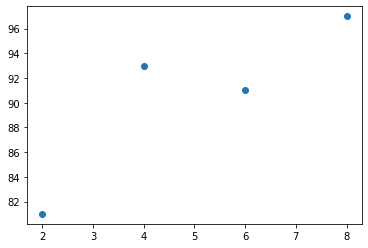

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X,Y)
plt.show()

In [ ]:
# 예측값 구하기
# y = ax + b
Y_pred = a * X + b
Y_pred

array([83.6, 88.2, 92.8, 97.4])

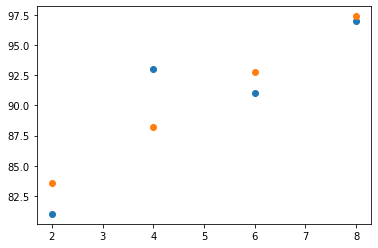

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X,Y)
plt.scatter(X, Y_pred)
plt.show()

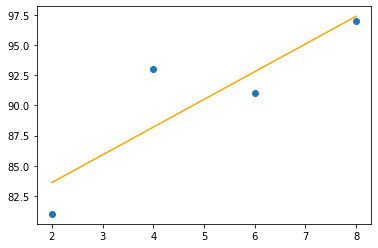

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X,Y)
plt.plot(X, Y_pred, c='orange')
plt.show()

# 평균 제곱 오차 (MSE)
- 주어진 선의 오차를 평가
- 오차의 합을 n 으로 나눈 것
- 단순한 데이터가 아니므로 최소 제곱법에 한계가 있으므로 사용
- 오차가 줄어드는 방향으로 a, b 값 부여
- 경사하강법

In [ ]:
# X,Y를 이용하여 평균 제곱 오차를 구하기

import numpy as np

X = np.array([2,4,6,8])
Y = np.array([81,93,91,97])

a= 3
b= 76

Y_pred = a * X + b
n=len(X)

MSE = 1/n*((Y-Y_pred)**2).sum()
print("MSE", MSE)

MSE 11.0


# 경사하강법
- 최솟값 : 꼭짓점 -> 기울기 0 -> 편미분
- 오차함수
- 전부 미분하면 시간이 많이 걸리니까 편미분

# 학습률
- 기울기가 0이 아니면 오차가 있다
- 반복적으로 기울기 a를 변화시켜 m을 찾아냄
- 학습률이 너무 크면 반대로 치솟음 (수렴하지않고 발산함)
- 적절한 학습률 찾아야함

In [ ]:
import numpy as np

# 리스트 컴프레이션
data = [[2,81],[4,93],[6,91],[8,97]]
data

[[2, 81], [4, 93], [6, 91], [8, 97]]

In [ ]:
x_data = [i[0] for i in data] # 리스트 컴프레이션
print(x_data)
y_data = [i[1] for i in data] # 리스트 컴프레이션
print(y_data)

[2, 4, 6, 8]
[81, 93, 91, 97]


In [ ]:
X = np.array(x_data)
Y = np.array(y_data)
print(X)
print(Y)

[2 4 6 8]
[81 93 91 97]


In [ ]:
a=0
b=0
lr = 0.03 # 보폭 learning_rate
epochs = 2001 # 반복횟수

In [ ]:
# 경사하강법
for i in range(epochs):
    # y = ax+b
    Y_pred = a * X +b

    # 오차 : 실제값 - 예측값
    error = Y - Y_pred

    # 오차 함수를 a로 편미분
    a_diff = -(2/len(X)) * sum(X * error)
    
    # 오차 함수를 b로 편미분
    b_diff = -(2/len(X)) * sum(error)

    # 새로운 a, b 적용
    a = a - lr * a_diff
    b = b - lr * b_diff

    if i % 100 ==0:
        print("epochs = %.f, 기울기 = %.04f, 절편 = %.04f"%(i,a,b))

epochs = 0, 기울기 = 27.8400, 절편 = 5.4300
epochs = 100, 기울기 = 7.0739, 절편 = 50.5117
epochs = 200, 기울기 = 4.0960, 절편 = 68.2822
epochs = 300, 기울기 = 2.9757, 절편 = 74.9678
epochs = 400, 기울기 = 2.5542, 절편 = 77.4830
epochs = 500, 기울기 = 2.3956, 절편 = 78.4293
epochs = 600, 기울기 = 2.3360, 절편 = 78.7853
epochs = 700, 기울기 = 2.3135, 절편 = 78.9192
epochs = 800, 기울기 = 2.3051, 절편 = 78.9696
epochs = 900, 기울기 = 2.3019, 절편 = 78.9886
epochs = 1000, 기울기 = 2.3007, 절편 = 78.9957
epochs = 1100, 기울기 = 2.3003, 절편 = 78.9984
epochs = 1200, 기울기 = 2.3001, 절편 = 78.9994
epochs = 1300, 기울기 = 2.3000, 절편 = 78.9998
epochs = 1400, 기울기 = 2.3000, 절편 = 78.9999
epochs = 1500, 기울기 = 2.3000, 절편 = 79.0000
epochs = 1600, 기울기 = 2.3000, 절편 = 79.0000
epochs = 1700, 기울기 = 2.3000, 절편 = 79.0000
epochs = 1800, 기울기 = 2.3000, 절편 = 79.0000
epochs = 1900, 기울기 = 2.3000, 절편 = 79.0000
epochs = 2000, 기울기 = 2.3000, 절편 = 79.0000


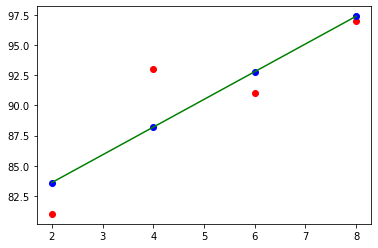

In [ ]:
Y_pred = a * X +b

import matplotlib.pyplot as plt

plt.scatter(X,Y,c="red")
plt.scatter(X,Y_pred,c="blue")
plt.plot(X,Y_pred,c="green")

plt.show()

# 다중 선형 회귀
- y = a1x1+a2x2+b


In [ ]:
import numpy as np

x1 = np.array([2,4,6,8])
x2 = np.array([0,4,2,3])
y = np.array([81,93,91,97])

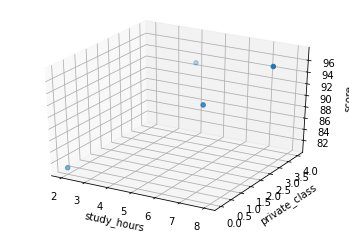

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection = '3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('score')

ax.scatter(x1,x2,y)